# Case Study: On-Farm Storage Capacity Analysis

In [436]:
#Import the modules required for the analysis
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import math
from shapely.geometry import Point

In [437]:
#Set the path
path = "/Users/yayincai/Documents/Job Hunting/Employer List/Indigo"
os.chdir(path)

In [438]:
#Read the data
parcels = gpd.read_file("parcels_ilmenard.shp")
bldg = gpd.read_file("silos_ilmenard.shp")

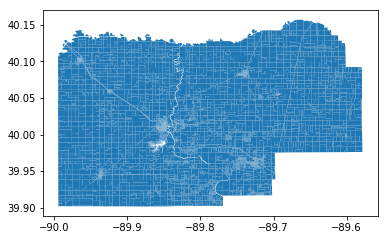

In [439]:
#Plot the parcels
parcels.plot()

In [440]:
#Have a look at the geodataframe
parcels.head(5)

,OGC_FID,PARCELNUMB,PARCEL_NUM,ALTERNATE_,TOWNSHIP,TOWNSHIP_N,SITE_CSZ,GROSS_ACRE,HOMESITE_A,FARM_ACRES,...,RVT_FLAG,CITY,COUNTY,GEOID,STATE,FID,PATH,ACRES,SQFT,geometry
0,9999,U/I,None,None,None,None,None,NaN,NaN,NaN,...,None,fancy-prairie-no-3,menard,17129,il,9999,/us/il/menard/fancy-prairie-no-3/9999,0.04,1801.0,POLYGON ((-89.59984228998277 39.99621069681282...
1,2998,U/I,None,None,None,None,None,NaN,NaN,NaN,...,None,petersburg-east-no-13,menard,17129,il,2998,/us/il/menard/petersburg-east-no-13/2998,0.03,1478.0,POLYGON ((-89.83210357890695 39.99015144928946...
2,6641,12-27-400-022,None,None,None,None,None,NaN,NaN,NaN,...,None,athens-north-no-2,menard,17129,il,6641,/us/il/menard/athens-north-no-2/6641,2.17,94653.0,POLYGON ((-89.75191577222456 39.98237372238361...
3,8338,11-14-218-005,None,None,None,None,None,NaN,NaN,NaN,...,None,petersburg-north-no-14,menard,17129,il,8338,/us/il/menard/petersburg-north-no-14/8338,0.01,588.0,"POLYGON ((-89.85153763818347 40.0179303771223,..."
4,2440,11-23-201-064,1123201064,None,11,T18N R7W,None,1.14,1.14,0.0,...,N,petersburg-south-no-15,menard,17129,il,2440,/us/il/menard/petersburg-south-no-15/2440,1.14,49481.0,POLYGON ((-89.84594642998294 39.99943392351625...


In [441]:
#See the columns of the parcels
parcels.columns

Index(['OGC_FID', 'PARCELNUMB', 'PARCEL_NUM', 'ALTERNATE_', 'TOWNSHIP',
       'TOWNSHIP_N', 'SITE_CSZ', 'GROSS_ACRE', 'HOMESITE_A', 'FARM_ACRES',
       'LASS', 'TAX_STATUS', 'LOT_DIMENS', 'OWNER1_ID', 'DOCUMENT_N',
       'OWNER1_ADD', 'OWNER1__01', 'OWNER1_CSZ', 'OWNER2_ID', 'DOCUMEN_01',
       'OWNER2_ADD', 'OWNER2__01', 'OWNER2_CSZ', 'LEGAL', 'DATE_OF_SA',
       'MAILTO_NAM', 'MAILTO__01', 'MAILTO_ADD', 'HEL_FLAG', 'MAILTO_CSZ',
       'HIS_FLAG', 'HIE_FLAG', 'HES_FLAG', 'HEP_FLAG', 'FAF_FLAG', 'VEZ_FLAG',
       'VET_FLAG', 'XMPT_FLAG', 'SAF_FLAG', 'DRN_FLAG', 'ASSESSED_L',
       'FARM_LAND', 'FARM_BUILD', 'NON_FARM_L', 'NON_FARM_B', 'TAX_BILLED',
       'TAX_CODE', 'CURRENT_AS', 'CURRENT_01', 'PY_NON_FAR', 'PY_NON__01',
       'PY_FARM_LA', 'PY_FARM_BL', 'TAXBILL_NA', 'TAXBILL_01', 'TAXBILL_AD',
       'TAXBILL_CS', 'TAXBILL_YE', 'TAXBILL_RA', 'TAXBILL_TA', 'INSTALL_1_',
       'INSTALL_01', 'INSTALL_2_', 'PRIOR_TAXB', 'PRIOR_T_01', 'PRIOR_T_02',
       'OWNER1_DOC', 'OWNER2_

In [442]:
#See the columns of the bldg
bldg.columns

Index(['DIAMETER', 'geometry'], dtype='object')

In [443]:
# Check if a string contains municipal info
def isMuni(string):
    if len(string)==0:
        return 0
    else:
        stringlst = string.split(" ")
        if ("INC" in stringlst) or ("CO" in stringlst) or ("CORP" in stringlst) or ("LLC" in stringlst) or ("LTD" in stringlst):
            return 0
        elif "CITY" in stringlst:
            return 1
        elif "COUNTY" in stringlst:
            return 1
        elif "STATE" in stringlst:
            return 1
        elif "DEPT" in stringlst:
            return 1
        else:
            return 0

In [444]:
# Check if the owner of the parcel is municipal organization
def checkMuni(df):
    df["OWNER"] = df["OWNER"].fillna("")
    df["OWNER_copy"] = df["OWNER"]
    df["muni"] = df["OWNER"].apply(lambda x: isMuni(x))

In [445]:
checkMuni(parcels)

In [446]:
parcels.head()

,OGC_FID,PARCELNUMB,PARCEL_NUM,ALTERNATE_,TOWNSHIP,TOWNSHIP_N,SITE_CSZ,GROSS_ACRE,HOMESITE_A,FARM_ACRES,...,COUNTY,GEOID,STATE,FID,PATH,ACRES,SQFT,geometry,OWNER_copy,muni
0,9999,U/I,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,9999,/us/il/menard/fancy-prairie-no-3/9999,0.04,1801.0,POLYGON ((-89.59984228998277 39.99621069681282...,,0
1,2998,U/I,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,2998,/us/il/menard/petersburg-east-no-13/2998,0.03,1478.0,POLYGON ((-89.83210357890695 39.99015144928946...,,0
2,6641,12-27-400-022,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,6641,/us/il/menard/athens-north-no-2/6641,2.17,94653.0,POLYGON ((-89.75191577222456 39.98237372238361...,,0
3,8338,11-14-218-005,None,None,None,None,None,NaN,NaN,NaN,...,menard,17129,il,8338,/us/il/menard/petersburg-north-no-14/8338,0.01,588.0,"POLYGON ((-89.85153763818347 40.0179303771223,...",,0
4,2440,11-23-201-064,1123201064,None,11,T18N R7W,None,1.14,1.14,0.0,...,menard,17129,il,2440,/us/il/menard/petersburg-south-no-15/2440,1.14,49481.0,POLYGON ((-89.84594642998294 39.99943392351625...,GRAND OAKS ESTATES HOMEOWNERS ASSOCIATON INC,0


In [447]:
# Check which are seens as municipal insititutions
parcels[parcels["muni"]==1].OWNER.unique()

array(['CITY OF PETERSBURG', 'MENARD COUNTY', 'ATHENS STATE BANK',
       'MENARD COUNTY HIGHWAY DEPT', 'MENARD COUNTY CEMETERY',
       'STATE OF ILLINOIS', 'COUNTY ESTATES I LP ATTN: ANNE R SMITH',
       'MENARD COUNTY HOUSING AUTHORITY', 'MENARD COUNTY AS TRUSTEE',
       'MENARD COUNTY RESCUE SQUAD', 'CITY OF ATHENS',
       'MENARD COUNTY ROAD DISTRICT #4', 'MENARD COUNTY ROAD DISTRICT 9',
       'MORGAN COUNTY ABSTRACT COMPANY', 'COUNTY OF MENARD',
       'MIDDLETOWN STATE BANK',
       'PARKSIDE HOMES LP C/O MENARD COUNTY HOUSING AUTHORITY',
       'MENARD COUNTY VFW POST 6871', 'MENARD COUNTY FARM BUREAU',
       'MENARD COUNTY ROAD DISTRICT #5 %JERRY TICE',
       'MENARD COUNTY THE PEOPLE OF',
       'MENARD COUNTY MENARD COUNTY HIGHWAY DEPT',
       'MENARD COUNTY PUBLIC BUILDING COMMISSION',
       'CITY OF PETERSBURG TRUSTEES', 'ROAD DISTRICT #2 MENARD COUNTY',
       'ATHENS STATE BANK ATN: RICHARD DENNIS', 'CITY PARK COUNTY',
       'ROAD DISTRICT #3 MENARD COUNTY C/O G

In [448]:
#Remove the buildings in the municipal parcels
def removeMuni(bldg, parcels):
    #Add an unique ID to the buildings
    bldg["UID"] = bldg.index
    #Spatial join the buildings and the parcels
    bldg2 = gpd.sjoin(bldg, parcels, how="inner", op='intersects')
    bldg2 = bldg2[["UID","muni"]]
    #Check if any part of the building located on the municipal parcel
    bldgunique = bldg2.groupby("UID").agg({"muni":"max"})
    bldgunique.reset_index(inplace=True)
    bldg = bldg.merge(bldgunique,on="UID")
    bldg["muni"] = bldg["muni"].fillna(0)
    bldg = bldg[bldg["muni"]==0]
    bldg.drop(["muni"],axis=1,inplace=True)
    return bldg

In [449]:
len(bldg)

617

In [450]:
grainbins = removeMuni(bldg, parcels)

In [451]:
#We can see no building is located on the municipal parcels
len(grainbins)

617

In [452]:
grainbins.head()

,DIAMETER,geometry,UID
0,5.970181,"POLYGON ((-89.761038140355 40.11017998598363, ...",0
1,5.782834,"POLYGON ((-89.7610309374848 40.110121105254, -...",1
2,4.725118,"POLYGON ((-89.76101939039121 40.1101153080984,...",2
3,10.958176,"POLYGON ((-89.7645452732458 40.11338562571487,...",3
4,8.454480,"POLYGON ((-89.7647079257188 40.11342932677454,...",4


In [453]:
#Select out the agricultural parcels based on the farm land area
def selectAgri(df):
    df1 = df[df["FARM_ACRES"]>0]
    return df1

In [454]:
agriparcels = selectAgri(parcels)

In [455]:
len(agriparcels)

4578

In [456]:
def calRadius(df):
    df["radius"] = (df["DIAMETER"]*3.28084)/2

def calArea(df):
    df["area"] = math.pi*df["radius"]*df["radius"]
    
def calVolume(df,height):
    df["volume_"+str(height)] = df["area"]*height
    
def calBushels(df,height):
    df["bushels_"+str(height)] = df["volume_"+str(height)]*0.85

In [457]:
calRadius(grainbins)
calArea(grainbins)

In [458]:
#Check if any agricultural parcel doesn't have the owner
len(agriparcels[agriparcels["OWNER"] == ""])

0

In [459]:
#Dissolve the parcels by owner name
agriparcels_byowners = agriparcels.dissolve(by='OWNER')

In [460]:
len(agriparcels_byowners)

1645

In [461]:
# Seperate the dissolved parcels if they are not adjacent
# Reference code: https://github.com/geopandas/geopandas/issues/369
def multi2single(gpdf):
    gpdf_singlepoly = gpdf[gpdf.geometry.type == 'Polygon']
    gpdf_multipoly = gpdf[gpdf.geometry.type == 'MultiPolygon']

    for i, row in gpdf_multipoly.iterrows():
        Series_geometries = pd.Series(row.geometry)
        df = pd.concat([gpd.GeoDataFrame(row, crs=gpdf_multipoly.crs).T]*len(Series_geometries), ignore_index=True)
        df['geometry']  = Series_geometries
        gpdf_singlepoly = pd.concat([gpdf_singlepoly, df])

    gpdf_singlepoly.reset_index(inplace=True, drop=True)
    return gpdf_singlepoly

In [462]:
agriparcels_byowners_explode = multi2single(agriparcels_byowners)
len(agriparcels_byowners_explode)

2367

In [463]:
#Reset the index to make each row have a unique id
agriparcels_byowners_explode.reset_index(inplace=True)
agriparcels_byowners_explode.head()

,index,geometry,OGC_FID,PARCELNUMB,PARCEL_NUM,ALTERNATE_,TOWNSHIP,TOWNSHIP_N,SITE_CSZ,GROSS_ACRE,...,CITY,COUNTY,GEOID,STATE,FID,PATH,ACRES,SQFT,OWNER_copy,muni
0,0,POLYGON ((-89.75018777276109 39.91643295168886...,967,17-15-400-012,1715400012,None,17,T17N R6W,None,10.3,...,athens-south-no-1,menard,17129,il,967,/us/il/menard/athens-south-no-1/967,10.31,448937,ABBOTT JERRY D & NANCY R,0
1,1,POLYGON ((-89.73308439735889 39.93819936195659...,7948,17-12-100-004,1712100004,None,17,T17N R6W,ATHENS IL 62613,25.55,...,athens-south-no-1,menard,17129,il,7948,/us/il/menard/athens-south-no-1/7948,25.57,1.11388e+06,ABELN BOBBY J,0
2,2,POLYGON ((-89.73308439735889 39.93819936195659...,947,17-11-400-009,1711400009,None,17,T17N R6W,None,0.6,...,athens-south-no-1,menard,17129,il,947,/us/il/menard/athens-south-no-1/947,0.6,26058,ABELN DIRK E,0
3,3,POLYGON ((-89.76445738612718 39.95739794372912...,10917,17-03-101-015,1703101015,None,17,T17N R6W,ATHENS IL 62613,13.856,...,athens-south-no-1,menard,17129,il,10917,/us/il/menard/athens-south-no-1/10917,13.43,585072,ADAMSKI DONALD JR & DEWANA,0
4,4,"POLYGON ((-89.7720171940997 39.9170961603952, ...",9988,17-21-200-006,1721200006,None,17,T17N R6W,PETERSBURG IL 62675,56.58,...,rock-creek-no-12,menard,17129,il,9988,/us/il/menard/rock-creek-no-12/9988,56.62,2.46634e+06,ADAMSKI ERIC W & GAIL A FAMILY TRUST,0


In [464]:
#Spatial join the parcels and grain bins to find the parcels which contain one or more bins
parcels_bins = gpd.sjoin(agriparcels_byowners_explode, grainbins, how="inner", op='intersects')

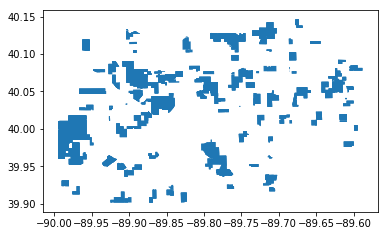

In [465]:
parcels_bins.plot()

In [466]:
parcels_bins.head()

,index,geometry,OGC_FID,PARCELNUMB,PARCEL_NUM,ALTERNATE_,TOWNSHIP,TOWNSHIP_N,SITE_CSZ,GROSS_ACRE,...,PATH,ACRES,SQFT,OWNER_copy,muni,index_right,DIAMETER,UID,radius,area
34,34,"POLYGON ((-89.89678492441328 39.9089232501436,...",8869,16-21-300-001,1621300001,None,16,T17N R7W,PLEASANT PLAINS IL 62677,79.8,...,/us/il/menard/tallula-no-11/8869,79.87,3.47905e+06,ARGO VERNON JR & SUE C AS TRUSTES,0,231,9.247437,231,15.169681,722.940891
57,57,"POLYGON ((-89.60851953421184 39.9758826885736,...",1785,13-25-300-002,1325300002,None,13,T18N R5W,None,80.8,...,/us/il/menard/fancy-prairie-no-3/1785,80.78,3.51859e+06,BARBER CHARLES F TRUST,0,13,8.848625,13,14.515462,661.929303
57,57,"POLYGON ((-89.60851953421184 39.9758826885736,...",1785,13-25-300-002,1325300002,None,13,T18N R5W,None,80.8,...,/us/il/menard/fancy-prairie-no-3/1785,80.78,3.51859e+06,BARBER CHARLES F TRUST,0,12,9.446571,12,15.496344,754.411576
57,57,"POLYGON ((-89.60851953421184 39.9758826885736,...",1785,13-25-300-002,1325300002,None,13,T18N R5W,None,80.8,...,/us/il/menard/fancy-prairie-no-3/1785,80.78,3.51859e+06,BARBER CHARLES F TRUST,0,11,8.127139,11,13.331921,558.387046
76,76,POLYGON ((-89.86437550244928 39.96162413003346...,3522,11-34-400-001,1134400001,None,11,T18N R7W,PETERSBURG IL 62675,117.53,...,/us/il/menard/petersburg-south-no-15/3522,117.62,5.12363e+06,BECKER GEORGE & BETTY,0,227,9.423046,227,15.457754,750.658900


In [467]:
#How many parcels have at least one bin?
len(parcels_bins)

574

In [468]:
parcels_bins_sum = parcels_bins.groupby("index").agg({"area":"sum"})

In [469]:
len(parcels_bins_sum)

135

In [470]:
parcels_bins_sum.head()

,area
index,
34,722.940891
57,1974.727926
76,1327.060989
98,4443.301657
133,2299.318857


In [471]:
parcels_bins_sum.reset_index(inplace=True)
calVolume(parcels_bins_sum,14)
calVolume(parcels_bins_sum,30)
calBushels(parcels_bins_sum,14)
calBushels(parcels_bins_sum,30)

In [472]:
parcels_bins_sum.head()

,index,area,volume_14,volume_30,bushels_14,bushels_30
0,34,722.940891,10121.172470,21688.226722,8602.996600,18434.992714
1,57,1974.727926,27646.190964,59241.837780,23499.262320,50355.562113
2,76,1327.060989,18578.853851,39811.829680,15792.025773,33840.055228
3,98,4443.301657,62206.223197,133299.049708,52875.289718,113304.192252
4,133,2299.318857,32190.463992,68979.565696,27361.894393,58632.630842


In [473]:
parcels_bins = parcels_bins.merge(parcels_bins_sum,on="index")

In [474]:
def plotMap(geodf, figwidth, figheight, column):
    vmin, vmax = geodf[column].min(),geodf[column].max()
    fig, ax = plt.subplots(1, figsize=(figwidth, figheight))
    geodf.plot(column=column, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)

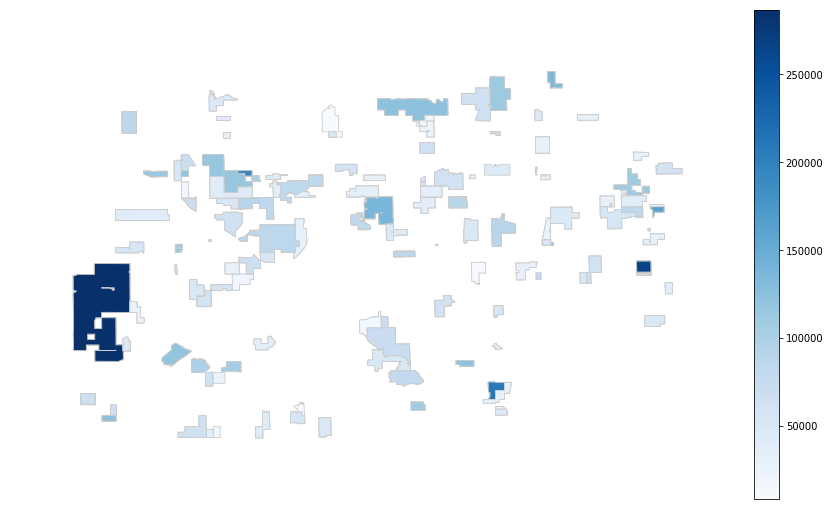

In [475]:
plotMap(parcels_bins, 15, 9, "bushels_30")

In [476]:
def classifyCapacity(capacity):
    if capacity<=40000:
        return 0
    elif capacity<=50000:
        return 1
    elif capacity<=70000:
        return 2
    elif capacity<=115000:
        return 3
    else:
        return 4

In [477]:
parcels_bins["max_capacity"] = parcels_bins["bushels_30"].apply(lambda x: classifyCapacity(x))

In [478]:
parcels_bins.to_file("parcels_bins.geojson",driver="GeoJSON")

In [482]:
agriparcels_byowners_explode.to_file("parcels_agri.geojson",driver="GeoJSON")

In [483]:
grainbins.to_file("grainbins.geojson",driver="GeoJSON")

In [484]:
grainbins

,DIAMETER,geometry,UID,radius,area
0,5.970181,"POLYGON ((-89.761038140355 40.11017998598363, ...",0,9.793605,301.324889
1,5.782834,"POLYGON ((-89.7610309374848 40.110121105254, -...",1,9.486277,282.710218
2,4.725118,"POLYGON ((-89.76101939039121 40.1101153080984,...",2,7.751178,188.749299
3,10.958176,"POLYGON ((-89.7645452732458 40.11338562571487,...",3,17.976011,1015.164693
4,8.454480,"POLYGON ((-89.7647079257188 40.11342932677454,...",4,13.868899,604.273886
5,8.168737,POLYGON ((-89.76480710162004 40.11343606984441...,5,13.400160,564.117849
6,8.273727,POLYGON ((-89.76492196367224 40.11343940063824...,6,13.572387,578.711810
7,8.475806,"POLYGON ((-89.7650326274786 40.1134367567451, ...",7,13.903882,607.326218
8,8.219675,POLYGON ((-89.76513550970466 40.11343733610629...,8,13.483720,571.175151
9,5.405831,"POLYGON ((-89.76474632362725 40.1132704627026,...",9,8.867833,247.050027
